In [1]:
#IMPORTING NECCESSARY MODULES
# -----------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes_data = pd.read_csv('diabetes.csv') # Reading the dataset into diabetes_data

In [3]:
diabetes_data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
diabetes_data.isnull().sum() # Count of null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_data.describe().T 

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [6]:
diabetes_data_copy = diabetes_data.copy()
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# Replacing null values with mean value
# ----------------------------------------
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(),inplace=True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(),inplace=True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].mean(),inplace=True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(),inplace=True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].mean(),inplace=True)

In [8]:
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## FEATURE_SCALING
### 1.NORMALIZATION

<AxesSubplot:>

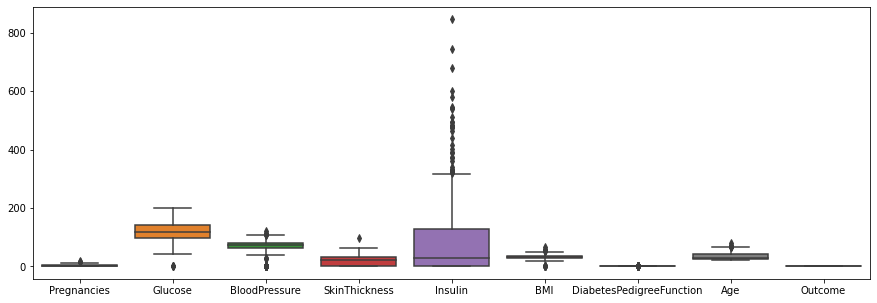

In [9]:
# DATA DISTRIBUTION BEFORE FEATURE SCALING
plt.subplots(figsize=(15, 5))         #setting figure size
sns.boxplot(data=diabetes_data)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = diabetes_data_copy.drop(['Outcome'],axis=1)
y = diabetes_data_copy['Outcome']
scaled_data = scaler.fit_transform(columns_to_scale)
scaled_data = pd.DataFrame(scaled_data,columns=diabetes_data_copy.columns[:-1])
scaled_data['Outcome'] = diabetes_data_copy['Outcome']

diabetes_data_copy = scaled_data
diabetes_data_copy.head(3)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.17013  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.17013  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.17013  0.104294   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1

<AxesSubplot:>

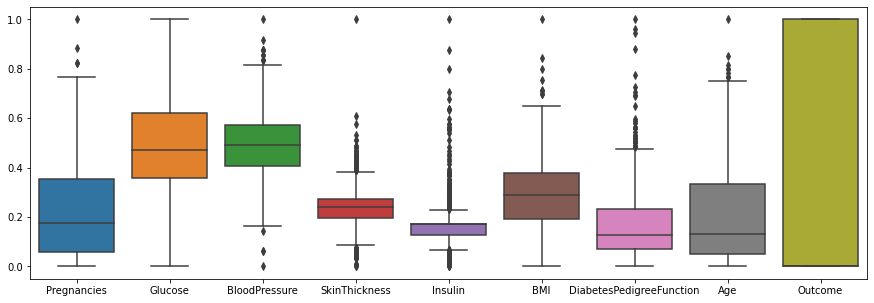

In [11]:
# DATA DISTRIBUTION AFTER NORMALIZATION
plt.subplots(figsize=(15, 5))         
sns.boxplot(data=diabetes_data_copy)

### 2.STANDARDIZATION

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = diabetes_data_copy.drop(['Outcome'],axis=1)
y = diabetes_data_copy['Outcome']
std_diabetes_data = scaler.fit_transform(cols_to_scale)
std_diabetes_data = pd.DataFrame(data=std_diabetes_data,columns=diabetes_data_copy.columns[:-1])
std_diabetes_data['Outcome'] = diabetes_data_copy['Outcome']
std_diabetes_data.head()

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518       0.665502 -2.717877e-16   
1    -0.844885 -1.206162      -0.529859      -0.017463 -2.717877e-16   
2     1.233880  2.015813      -0.695306       0.000000 -2.717877e-16   
3    -0.844885 -1.074652      -0.529859      -0.700429 -7.243887e-01   
4    -1.141852  0.503458      -2.680669       0.665502  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.166292                  0.468492  1.425995        1  
1 -0.852531                 -0.365061 -0.190672        0  
2 -1.332833                  0.604397 -0.105584        1  
3 -0.634212                 -0.920763 -1.041549        0  
4  1.548980                  5.484909 -0.020496        1

In [13]:
std_diabetes_data.describe().T

count          mean       std       min       25%  \
Pregnancies               768.0 -9.251859e-18  1.000652 -1.141852 -0.844885   
Glucose                   768.0 -1.156482e-17  1.000652 -2.554131 -0.721221   
BloodPressure             768.0 -3.932040e-16  1.000652 -4.004245 -0.695306   
SkinThickness             768.0  1.179612e-16  1.000652 -2.521670 -0.472774   
Insulin                   768.0 -2.844947e-16  1.000652 -1.665945 -0.400729   
BMI                       768.0  2.035409e-16  1.000652 -2.075119 -0.721540   
DiabetesPedigreeFunction  768.0  2.775558e-17  1.000652 -1.189553 -0.688969   
Age                       768.0  1.156482e-18  1.000652 -1.041549 -0.786286   
Outcome                   768.0  3.489583e-01  0.476951  0.000000  0.000000   

                                   50%           75%       max  
Pregnancies              -2.509521e-01  6.399473e-01  3.906578  
Glucose                  -1.540881e-01  6.103090e-01  2.541850  
BloodPressure            -1.675912e-02  6.282695e-01  4.102655  
SkinThickness             0.000000e+00  3.240194e-01  7.950467  
Insulin                  -2.717877e-16 -2.717877e-16  8.126238  
BMI                      -8.363615e-03  6.029301e-01  5.042087  
DiabetesPedigreeFunction -3.001282e-01  4.662269e-01  5.883565  
Age                      -3.608474e-01  6.602056e-01  4.063716  
Outcome                   0.000000e+00  1.000000e+00  1.000000

<AxesSubplot:>

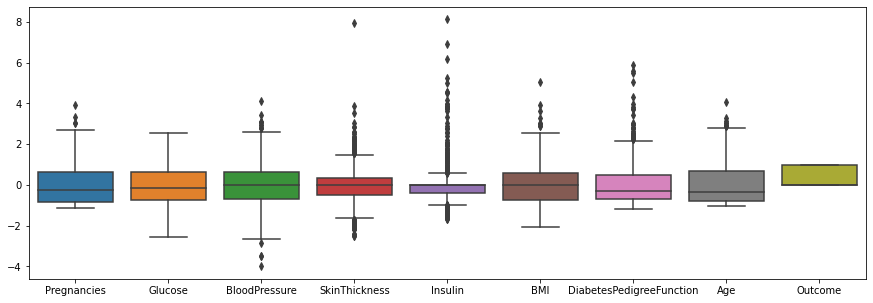

In [14]:
# DATA DISTRIBUTION AFTER STANDARDIZATION
plt.figure(figsize=(15,5))
sns.boxplot(data=std_diabetes_data)

## SMOTE ANALYSIS

<AxesSubplot:xlabel='Outcome', ylabel='count'>

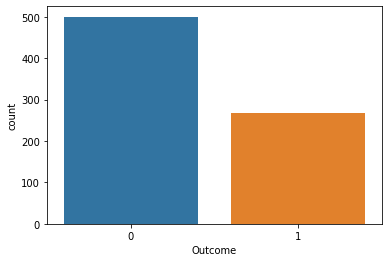

In [15]:
# OUTCOME DISTRIBUTION BEFORE SMOTE ANALYSIS
sns.countplot(data=std_diabetes_data,x='Outcome')

In [16]:
std_diabetes_data.shape

(768, 9)

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x = std_diabetes_data.drop(['Outcome'],axis=1)
y = std_diabetes_data['Outcome']
x_smote,y_smote = smote.fit_resample(x,y)
data_after_smote = pd.DataFrame(data=x_smote,columns=std_diabetes_data.columns[:-1])
data_after_smote['Outcome'] = pd.DataFrame(y_smote)
data_after_smote.head(3)

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518       0.665502 -2.717877e-16   
1    -0.844885 -1.206162      -0.529859      -0.017463 -2.717877e-16   
2     1.233880  2.015813      -0.695306       0.000000 -2.717877e-16   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.166292                  0.468492  1.425995        1  
1 -0.852531                 -0.365061 -0.190672        0  
2 -1.332833                  0.604397 -0.105584        1

<AxesSubplot:xlabel='Outcome', ylabel='count'>

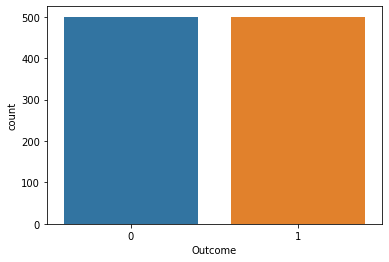

In [18]:
sns.countplot(data=data_after_smote,x='Outcome')

In [19]:
data_after_smote.shape

(1000, 9)

## FEATURE SELECTION

In [20]:
corr_matrix = diabetes_data.corr()
corr_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<AxesSubplot:title={'center':'Correlation Heatmap'}>

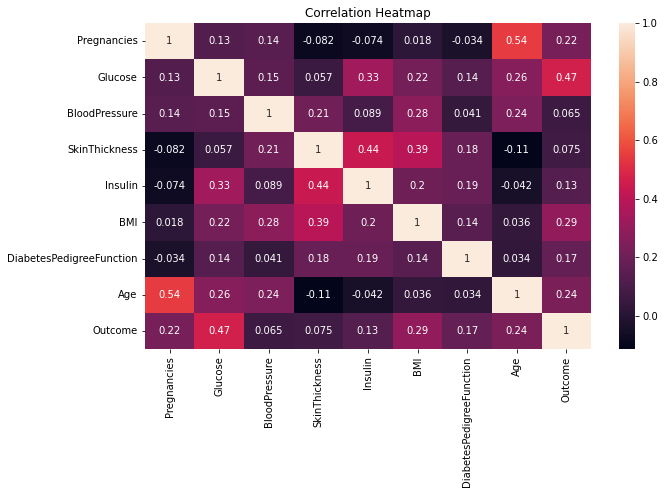

In [21]:
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap")
sns.heatmap(corr_matrix,annot=True)

In [22]:
#ANOVA FEATURE SELECTION
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x = std_diabetes_data.drop(columns='Outcome',axis=1)
y = std_diabetes_data['Outcome']

In [23]:
fvaluse_selector = SelectKBest(f_classif,k=4)
x_kbest = fvaluse_selector.fit_transform(x,y)

In [24]:
x_kbest.shape

(768, 4)

In [25]:
pd.DataFrame(x_kbest)

0         1         2         3
0    0.639947  0.865108  0.166292  1.425995
1   -0.844885 -1.206162 -0.852531 -0.190672
2    1.233880  2.015813 -1.332833 -0.105584
3   -0.844885 -1.074652 -0.634212 -1.041549
4   -1.141852  0.503458  1.548980 -0.020496
..        ...       ...       ...       ...
763  1.827813 -0.680125  0.064409  2.532136
764 -0.547919  0.010298  0.632039 -0.531023
765  0.342981 -0.022579 -0.910750 -0.275760
766 -0.844885  0.141808 -0.343120  1.170732
767 -0.844885 -0.943143 -0.299456 -0.871374

[768 rows x 4 columns]

In [26]:
#BACKWARD SELECTION
x1 = diabetes_data_copy.drop(columns='Outcome',axis=1)
y1 = diabetes_data_copy['Outcome']
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
sfs1 = sfs(rf,k_features=4,forward=False,verbose=1,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(x1,y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
Features: 4/4

In [27]:
selected_features = list(sfs1.k_feature_names_)
print(selected_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'BMI']


..............................................................................................................

## ALGORITHMS
### 1. CATBOOST

In [44]:
# prediction with selected features including smote analysis
x = data_after_smote.drop(columns=['DiabetesPedigreeFunction','Age','SkinThickness','Insulin','Outcome'],axis=1)
y = data_after_smote['Outcome']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
from catboost import CatBoostClassifier,Pool
from sklearn import metrics
eval_dataset = Pool(x_test,y_test)
model = CatBoostClassifier(eval_metric='AUC')
model.fit(x_train,y_train,eval_set=eval_dataset)

Learning rate set to 0.02999
0:	test: 0.7953795	best: 0.7953795 (0)	total: 3.74ms	remaining: 3.74s
1:	test: 0.8126813	best: 0.8126813 (1)	total: 6.98ms	remaining: 3.48s
2:	test: 0.8147315	best: 0.8147315 (2)	total: 8.6ms	remaining: 2.86s
3:	test: 0.8183318	best: 0.8183318 (3)	total: 10.2ms	remaining: 2.53s
4:	test: 0.8180818	best: 0.8183318 (3)	total: 11.8ms	remaining: 2.34s
5:	test: 0.8225323	best: 0.8225323 (5)	total: 13.4ms	remaining: 2.21s
6:	test: 0.8197820	best: 0.8225323 (5)	total: 15.1ms	remaining: 2.13s
7:	test: 0.8217822	best: 0.8225323 (5)	total: 16.7ms	remaining: 2.07s
8:	test: 0.8243324	best: 0.8243324 (8)	total: 18.2ms	remaining: 2s
9:	test: 0.8283328	best: 0.8283328 (9)	total: 19.8ms	remaining: 1.96s
10:	test: 0.8276328	best: 0.8283328 (9)	total: 21.4ms	remaining: 1.92s
11:	test: 0.8297330	best: 0.8297330 (11)	total: 23ms	remaining: 1.89s
12:	test: 0.8322332	best: 0.8322332 (12)	total: 24.5ms	remaining: 1.86s
13:	test: 0.8312831	best: 0.8322332 (12)	total: 26.1ms	remaini

In [48]:
model.get_best_score()

{'learn': {'Logloss': 0.10156915664672851},
 'validation': {'Logloss': 0.4718096407942481, 'AUC': 0.8606860686068607}}

In [49]:
predicted_y = model.predict(x_test)
mat = metrics.confusion_matrix(y_test,predicted_y)
print(mat)

[[75 24]
 [20 81]]


In [50]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

78.0


In [51]:
#prediction with all features excluding smote analysis
x = diabetes_data.drop(columns=['Outcome'],axis=1)
y = diabetes_data['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
from catboost import CatBoostClassifier,Pool
from sklearn import metrics
eval_dataset = Pool(x_test,y_test)
model = CatBoostClassifier(eval_metric='AUC')
model.fit(x_train,y_train,eval_set=eval_dataset)

Learning rate set to 0.028092
0:	test: 0.7593205	best: 0.7593205 (0)	total: 3.68ms	remaining: 3.68s
1:	test: 0.8056015	best: 0.8056015 (1)	total: 7.61ms	remaining: 3.8s
2:	test: 0.8150597	best: 0.8150597 (2)	total: 9.43ms	remaining: 3.13s
3:	test: 0.8139578	best: 0.8150597 (2)	total: 11.1ms	remaining: 2.75s
4:	test: 0.8104683	best: 0.8150597 (2)	total: 12.6ms	remaining: 2.5s
5:	test: 0.8192837	best: 0.8192837 (5)	total: 14.1ms	remaining: 2.34s
6:	test: 0.8176309	best: 0.8192837 (5)	total: 15.7ms	remaining: 2.23s
7:	test: 0.8172635	best: 0.8192837 (5)	total: 17.2ms	remaining: 2.13s
8:	test: 0.8170799	best: 0.8192837 (5)	total: 18.9ms	remaining: 2.08s
9:	test: 0.8179982	best: 0.8192837 (5)	total: 20.5ms	remaining: 2.03s
10:	test: 0.8150597	best: 0.8192837 (5)	total: 22.2ms	remaining: 1.99s
11:	test: 0.8135904	best: 0.8192837 (5)	total: 23.7ms	remaining: 1.95s
12:	test: 0.8139578	best: 0.8192837 (5)	total: 25.4ms	remaining: 1.93s
13:	test: 0.8143251	best: 0.8192837 (5)	total: 26.9ms	remai

In [53]:
model.best_score_

{'learn': {'Logloss': 0.04538211509121236},
 'validation': {'Logloss': 0.48616887184055246, 'AUC': 0.8284664830119376}}

In [54]:
predicted_y = model.predict(x_test)
mat = metrics.confusion_matrix(y_test,predicted_y)
print(mat)

[[82 17]
 [20 35]]


In [55]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

75.97402597402598


CATBOOST
1. With smote analysis
    AUC =      86.06,
    Accuracy = 78
2. without smote analysis
    AUC =      82.84,
    Accuracy = 75.97

### 2. LIGHTGBM

In [184]:
import lightgbm as lgb
x = data_after_smote.drop(columns=['DiabetesPedigreeFunction','Age','SkinThickness','Insulin','Outcome'],axis=1)
y = data_after_smote['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = lgb.LGBMClassifier(learning_rate=0.006, min_child_samples=10,num_leaves=20, reg_alpha=0.03,n_estimators=1000)
model.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric='AUC',verbose=False)

/home/user/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.006, min_child_samples=10, n_estimators=1000,
               num_leaves=20, reg_alpha=0.03)

In [185]:
model.best_score_

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('auc', 0.8498849884988499),
                          ('binary_logloss', 0.48999765557688635)])})

In [186]:
predicted_y = model.predict(x_test)
mat = metrics.confusion_matrix(y_test,predicted_y)
print(mat)

[[74 25]
 [20 81]]


In [187]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

77.5


In [181]:
#Grid search for hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'num_leaves':[20,40,80,100],
             'min_child_samples':[5,10,15],
             'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.0003,0.006,0.005],
             'reg_alpha':[0.1,0.02,0.03,0.5]}
halving_srch = HalvingGridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy')
halving_srch.fit(x_train,y_train)

HalvingGridSearchCV(estimator=LGBMClassifier(learning_rate=0.03,
                                             min_child_samples=10,
                                             n_estimators=1000, num_leaves=20,
                                             reg_alpha=0.5),
                    param_grid={'learning_rate': [0.05, 0.0003, 0.006, 0.005],
                                'max_depth': [-1, 5, 10, 20],
                                'min_child_samples': [5, 10, 15],
                                'num_leaves': [20, 40, 80, 100],
                                'reg_alpha': [0.1, 0.02, 0.03, 0.5]},
                    scoring='accuracy')

In [182]:
halving_srch.best_estimator_

LGBMClassifier(learning_rate=0.006, min_child_samples=10, n_estimators=1000,
               num_leaves=20, reg_alpha=0.03)